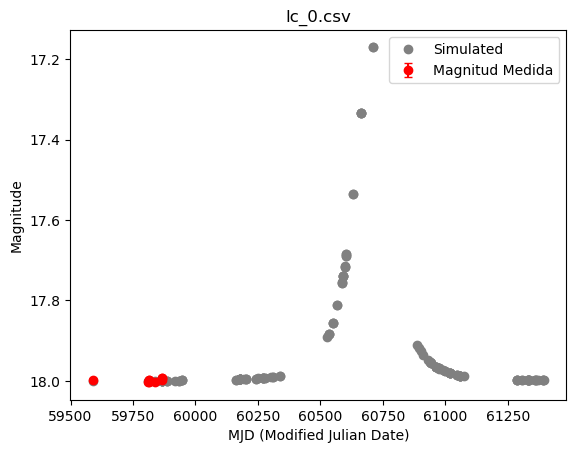

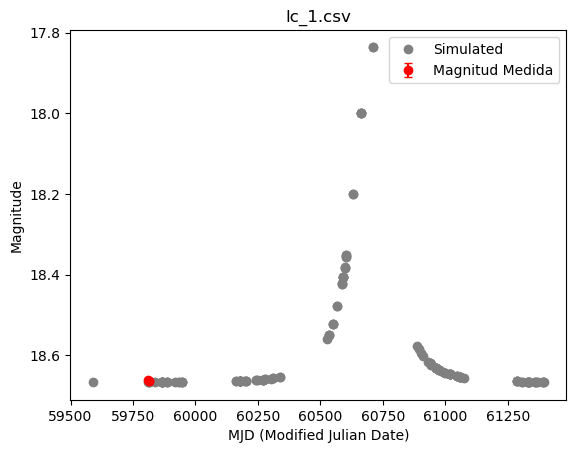

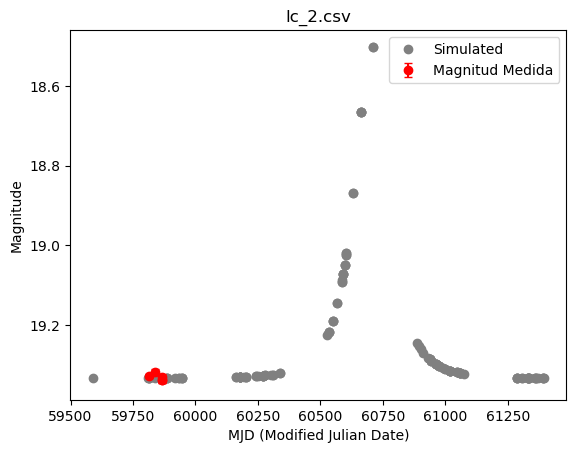

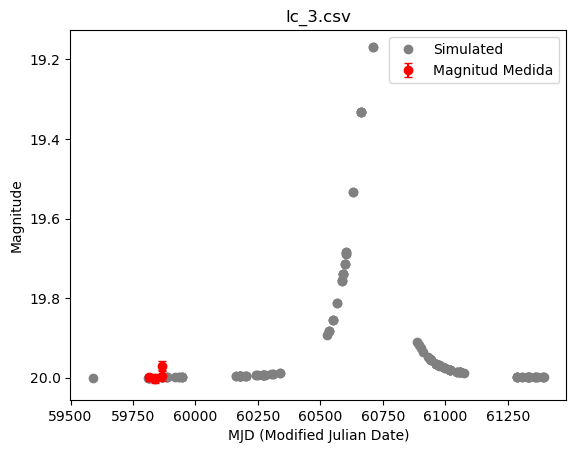

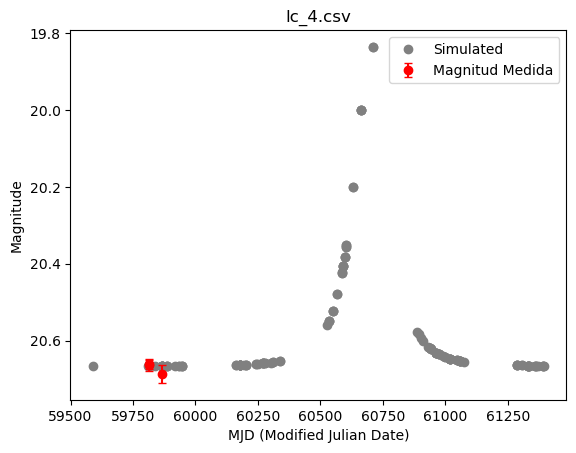

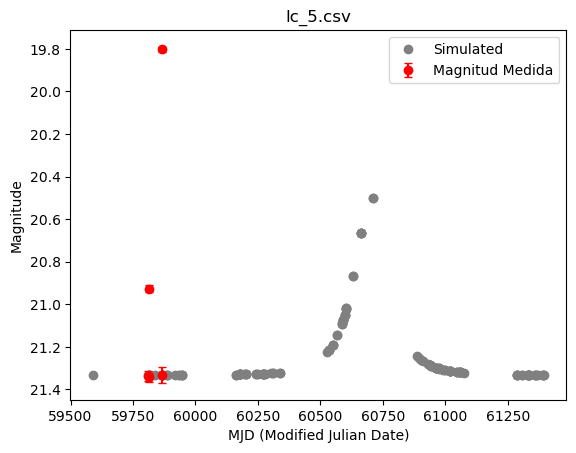

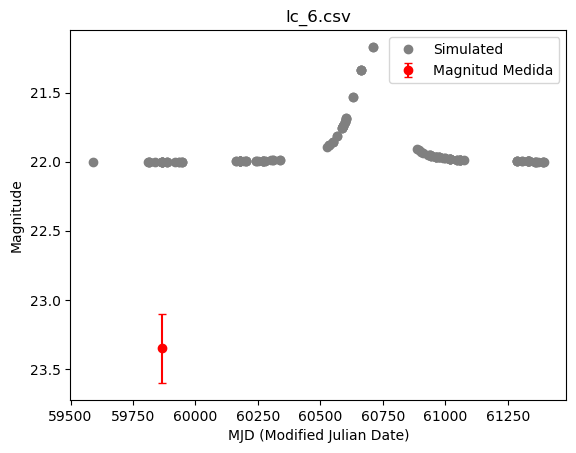

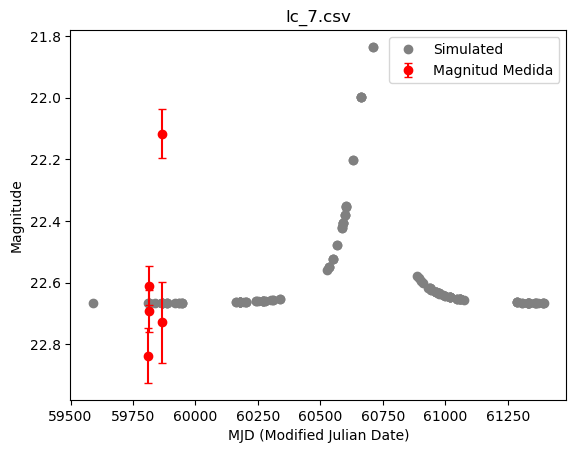

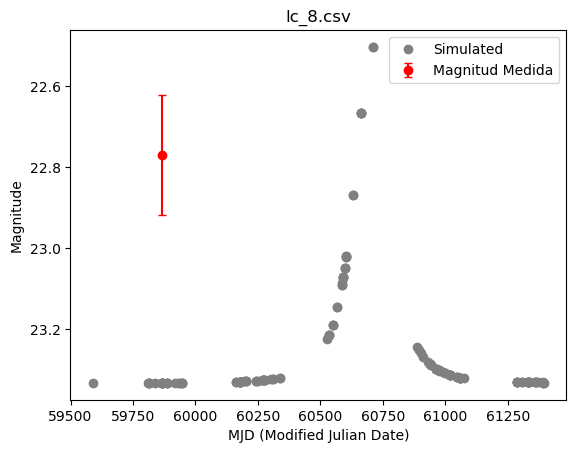

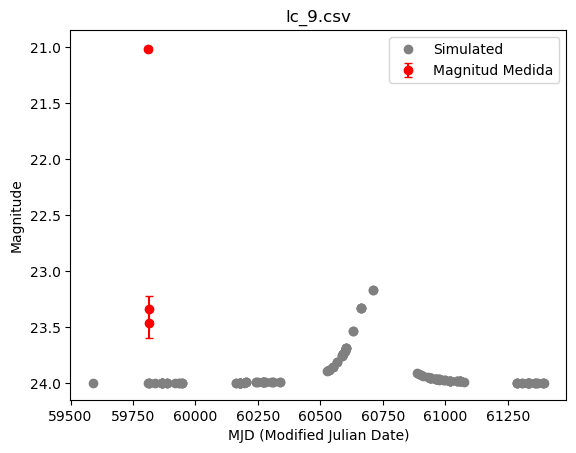

In [3]:
# Plot light curves from a run
import pandas as pd
n=10; lvl = 20
path = f"runs/run_{n}pts_{lvl}lvl/"
for lc_path in sorted([file for file in os.listdir(path) if file.startswith("lc")]):
    lc = LightCurve(data=pd.read_csv(path+lc_path))
    lc.plot(title = lc_path)


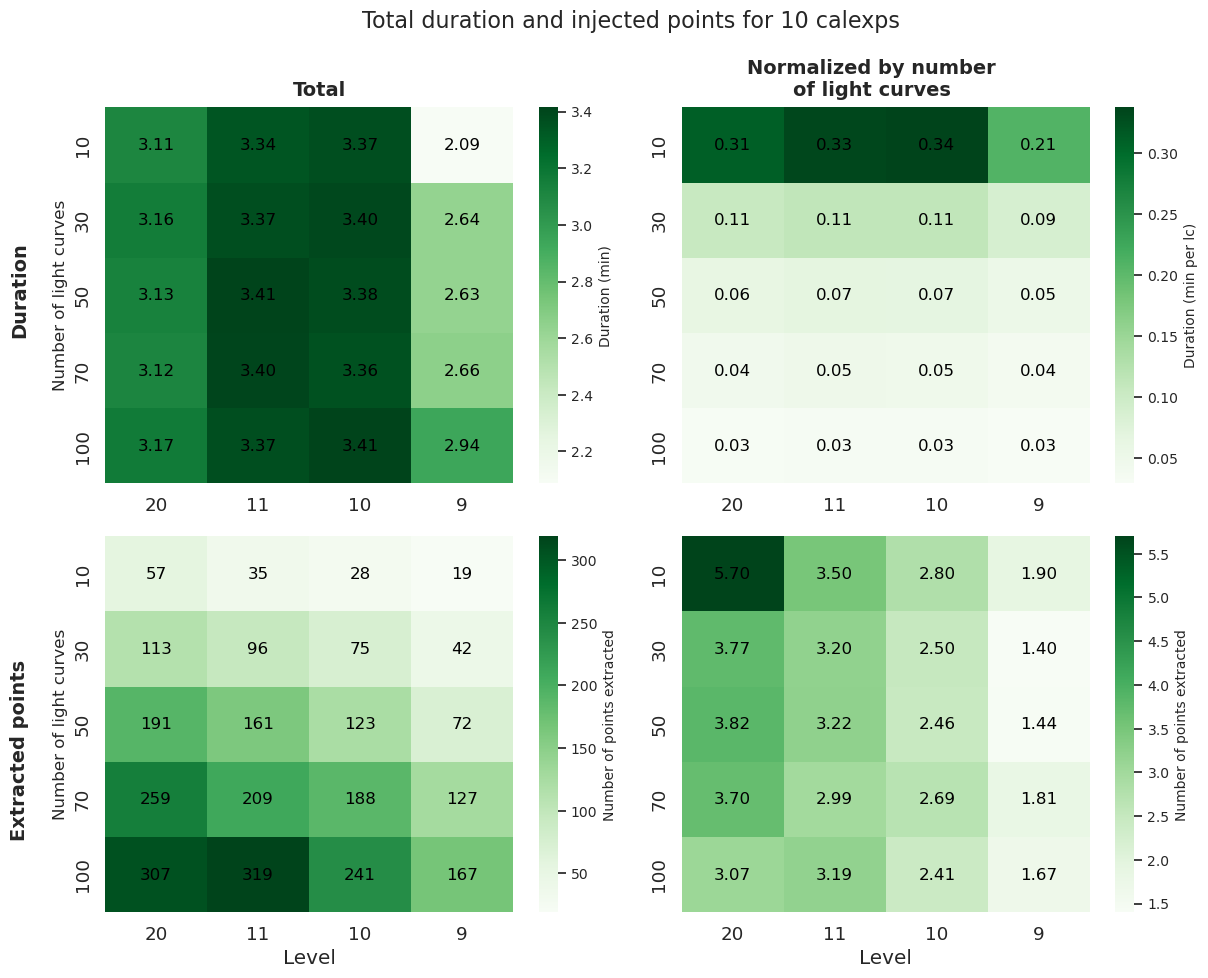

In [132]:
# Total durations and total extracted points per HTM level and points injected
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)


fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle("Total duration and injected points for 10 calexps", fontsize=16) 

# Gráfico 1: Duration
sns.heatmap(durations, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 0])
cbar = axes[0, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  
cbar.set_label('Duration (min)', fontsize=10)  
axes[0, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[0, 0].set_title('Duration')

# Gráfico 2: Duration - Normalized
sns.heatmap(durations_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 1])
cbar = axes[0, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Duration (min per lc)', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
# axes[0, 1].set_title('Duration - Normalized')

# Gráfico 3: Injected points
sns.heatmap(points, cmap='Greens', annot=True, fmt=".0f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 0])
cbar = axes[1, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 0].set_xlabel('Level')
axes[1, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[1, 0].set_title('Injected points')

# Gráfico 4: Injected points - Normalized
sns.heatmap(points_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 1])
cbar = axes[1, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 1].set_xlabel('Level')
# axes[1, 1].set_title('Injected points - Normalized')

# Etiquetas de las filas y columnas
fig.text(0.24, 0.9, 'Total', ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.7, 0.91, 'Normalized by number\nof light curves', ha='center', va='center', fontsize=14, fontweight='bold')

fig.text(-0.01, 0.7, 'Duration', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')
fig.text(-0.01, 0.24, 'Extracted points', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect ajusta el espacio para el título general
plt.savefig('runs/test_10_calexps/comparative_analysis.png', bbox_inches='tight')  # Guardar la figura combinada
plt.show()


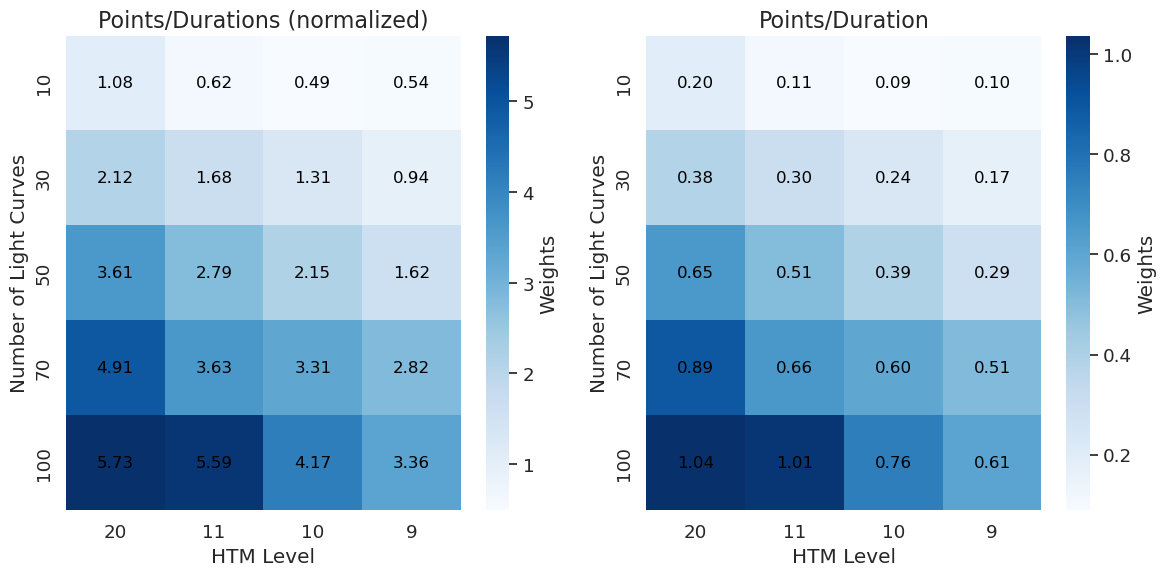

In [144]:
# Optimization index: maximize [extracted_points]/[duration]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_points = [10, 30, 50, 70, 100]
levels = [20, 11, 10, 9]
durations = np.zeros((len(n_points), len(levels)))
durations_normalized = np.zeros((len(n_points), len(levels)))
points = np.zeros((len(n_points), len(levels)))
points_normalized = np.zeros((len(n_points), len(levels)))
weights = np.zeros((len(n_points), len(levels)))

for i, n in enumerate(n_points):
    for j, lvl in enumerate(levels):
        time_path = f"runs/test_10_calexps/run_{n}pts_{lvl}lvl/time_log.csv"
        df = pd.read_csv(time_path)
        points[i, j] = sum(df[df["task"] == "Finding points"]["detail"])
        points_normalized[i, j] = sum(df[df["task"] == "Finding points"]["detail"]) / n
        times = df["time"].values
        total_duration = times[-1] - times[1]
        durations[i, j] = total_duration / 60
        durations_normalized[i, j] = (total_duration / 60) / n

weights_1 = (points_normalized / np.max(points_normalized)) / (durations_normalized / np.max(durations_normalized))
weights_2 = (points / np.max(points)) / (durations / np.max(durations))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(weights_1, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[0])
axes[0].set_xlabel('HTM Level')
axes[0].set_ylabel('Number of Light Curves')
axes[0].set_title('Points/Durations (normalized)', fontsize=16)

sns.heatmap(weights_2, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[1])
axes[1].set_xlabel('HTM Level')
axes[1].set_ylabel('Number of Light Curves')
axes[1].set_title('Points/Duration', fontsize=16)

plt.tight_layout()
plt.savefig('runs/test_10_calexps/optimization_analysis_combined.png', bbox_inches='tight')
plt.show()


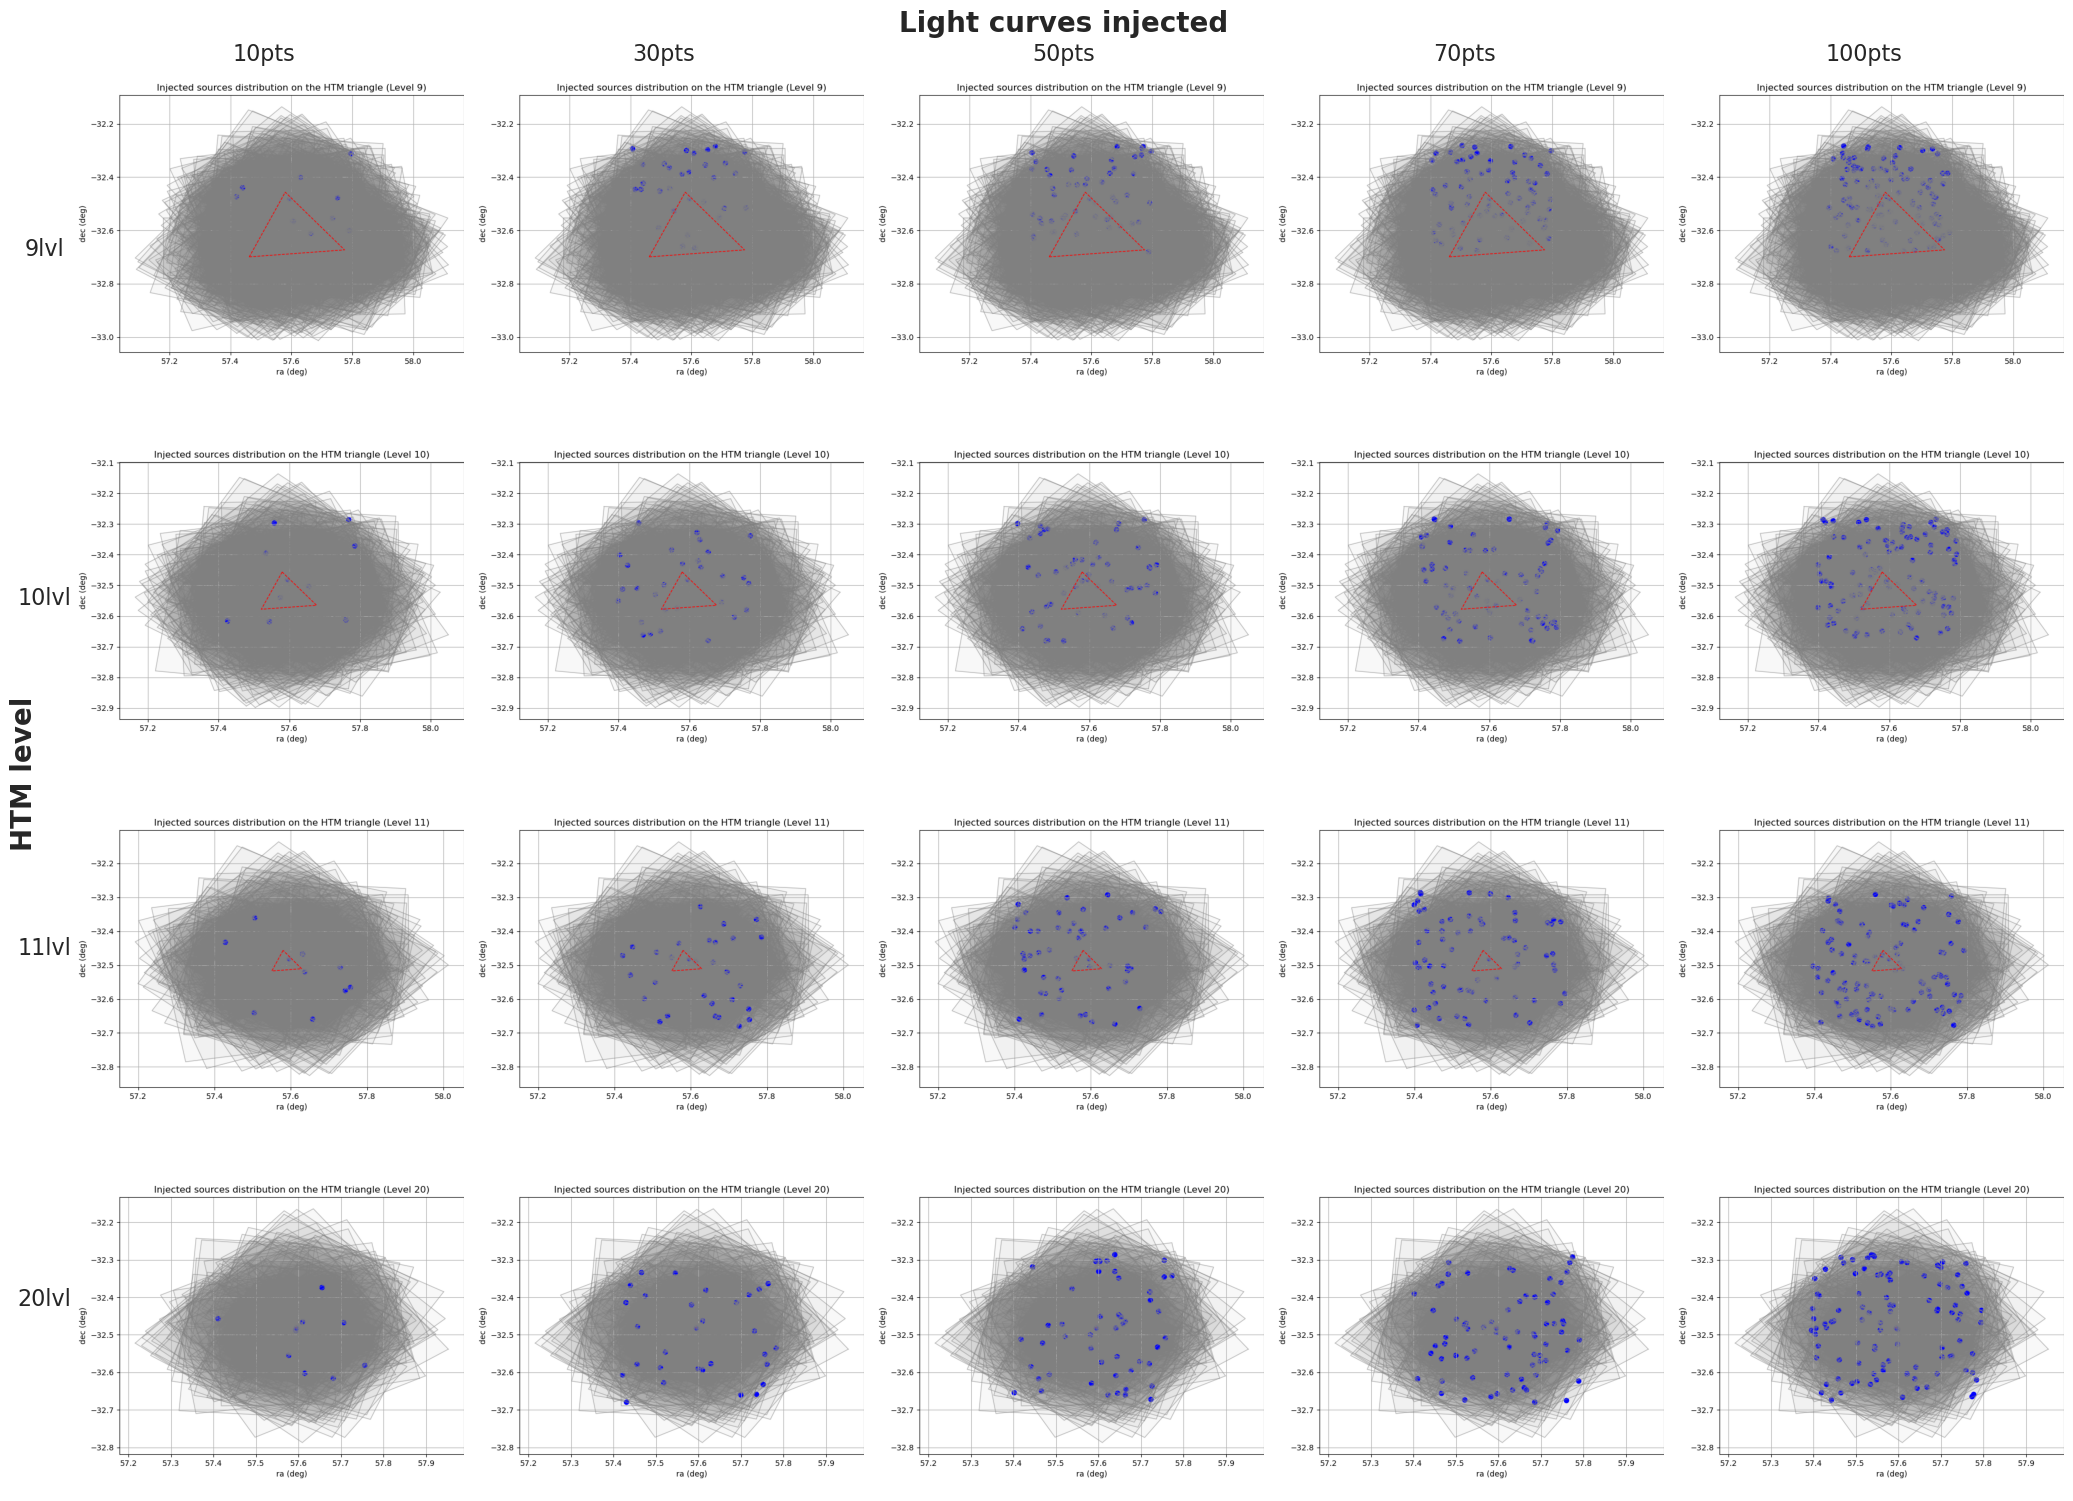

In [133]:
# Sky plots of injected sources + HTM triangle + calexps (for each combination of lvl and n_lc
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

main_folder = "runs/test_10_calexps"
pattern = r"run_(\d+)pts_(\d+)lvl"

plots = []
pts_values = []
lvl_values = []

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(pattern, subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(int(pts))
            lvl_values.append(int(lvl))
            
            sky_map_path = os.path.join(subfolder_path, "sky_map.png")
            if os.path.exists(sky_map_path):
                plots.append(sky_map_path)

unique_pts = sorted(set(pts_values))  
unique_lvl = sorted(set(lvl_values)) 


fig, axes = plt.subplots(len(unique_lvl), len(unique_pts), figsize=(20, 15))
axes = axes.reshape((len(unique_lvl), len(unique_pts)))
for i, lvl in enumerate(unique_lvl):
    for j, pts in enumerate(unique_pts):
        matching_plots = [plot for plot, p, l in zip(plots, pts_values, lvl_values) if p == pts and l == lvl]
        if matching_plots:
            img = Image.open(matching_plots[0])
            width, height = img.size
            new_width = int(width * 0.9) 
            img_cropped = img.crop((0, 0, new_width, height)) 
            img_cropped = img_cropped.convert("RGB")  
            img_array = np.array(img_cropped)
            ax = axes[i, j]
            ax.imshow(img_array)
            ax.axis('off')

fig.text(0.5, 1, 'Light curves injected', ha='center', va='center', fontsize=20, fontweight='bold')

for i, pts in enumerate(unique_pts):
    fig.text(0.1 + i * (0.8 / (len(unique_pts) - 1)), 0.98, f'{pts}pts', ha='center', va='center', fontsize=16)

fig.text(-0.02, 0.5, 'HTM level', ha='center', va='center', fontsize=20, fontweight='bold', rotation='vertical')

for i, lvl in enumerate(unique_lvl):
    fig.text(-0.01, 0.85 - i * (0.7 / (len(unique_lvl) - 1)), f'{lvl}lvl', ha='center', va='center', fontsize=16)

plt.subplots_adjust(hspace=0.01, wspace=0.01)  
plt.tight_layout(pad=0.01)
plt.savefig(main_folder+"/all_sky_maps.png", bbox_inches='tight')
plt.show()


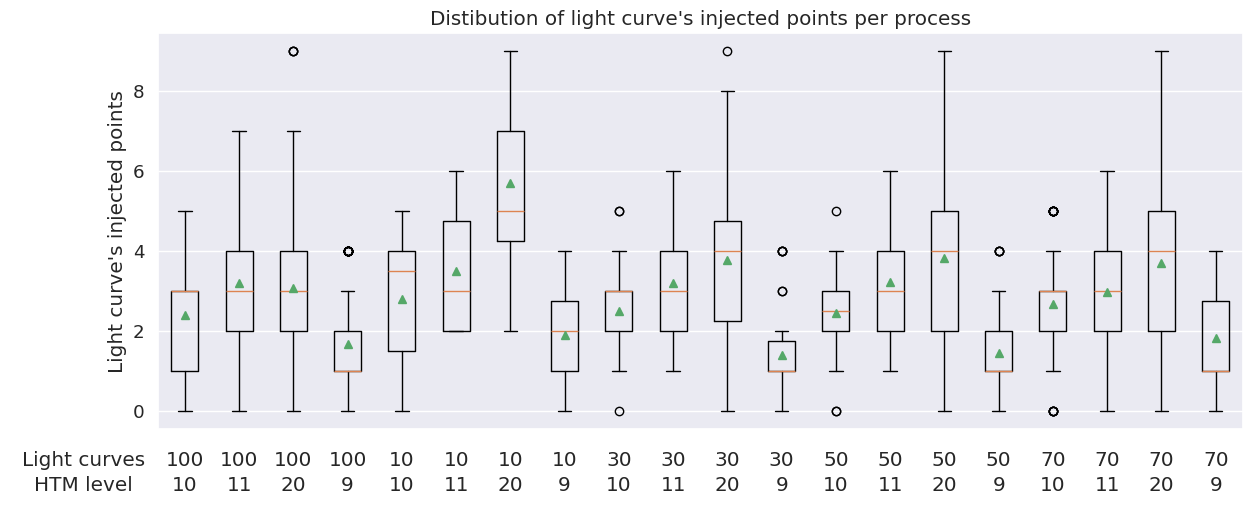

In [67]:
# Distribution of points extracted per light curve for each combination of HMTlevel and injected light curve
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

main_folder = "runs/test_10_calexps"
data_counts = []
pts_values = []
lvl_values = []

for subfolder in sorted([file for file in os.listdir(main_folder) if file.startswith("run")]):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(r'run_(\d+)pts_(\d+)lvl', subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(pts)
            lvl_values.append(lvl)

            mag_counts = []
            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(subfolder_path, file)
                    df = pd.read_csv(file_path)
                    if "mag" in df.columns:
                        mag_count = df["mag"].count() 
                        mag_counts.append(mag_count)
            if mag_counts:
                data_counts.append(mag_counts)

from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(2, 1, height_ratios=[9, 1], hspace=0.1)  

ax_boxplot = fig.add_subplot(gs[0])
ax_boxplot.boxplot(data_counts, showmeans=True)
ax_boxplot.set_ylabel("Light curve's injected points")
ax_boxplot.set_title("Distibution of light curve's injected points per process")
ax_boxplot.set_xticks([])  

ax_table = fig.add_subplot(gs[1])
ax_table.axis("off")  

table_data = [pts_values, lvl_values]
row_labels = ["Light curves", "HTM level"]
table = ax_table.table(cellText=table_data, rowLabels=row_labels,loc="center", cellLoc='center', rowLoc='center')

for cell in table.properties()['celld'].values():
    cell.set_linewidth(0)  

table.scale(1, 1.5) 
plt.savefig(main_folder+"/injected_points_per_lc_analysis.png")
plt.show()

Text(0.5, 1.0, 'Number of sources per calexp (total = 36)')

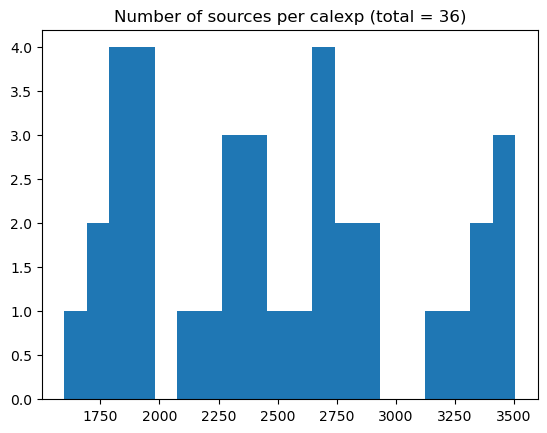

In [17]:
import matplotlib.pyplot as plt
plt.hist(n_sources, bins = 20)
plt.title(f"Number of sources per calexp (total = {len(n_sources)})")

### Collect calexps analysis (Overlap / HTM)
* Inserting into the region (circle / triangle)
* Number of calexps

analysis/overlap_calexps
analysis/htm_calexps

In [2]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt

#### Defining position to insert (into the region)

||||||||||||||------------LEVEL: 20 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 9871854450032 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


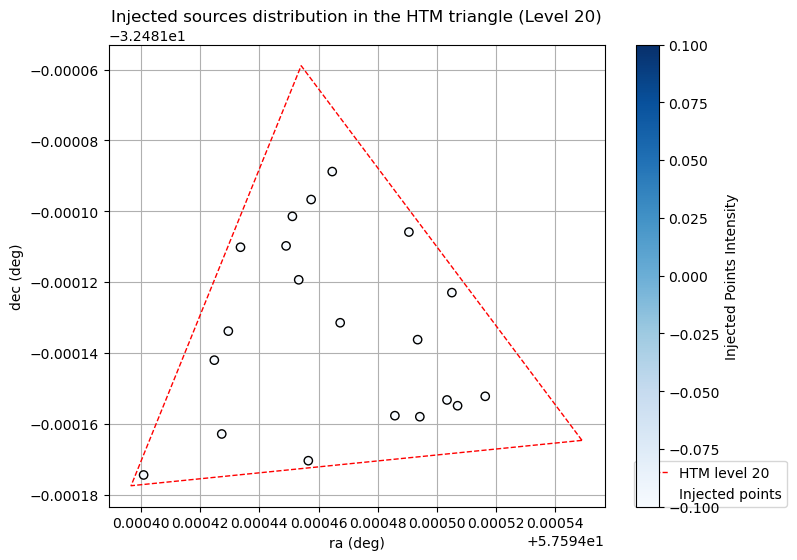

In [105]:
# check triangle injection HTM
ratio_lc_area = [0.05,0.1,0.15]
levels = [20]
problems = []
numb = [20, 25, 40, 55]
for n, lvl in zip(numb,levels):
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
    for p in params[1:]:
        process.add_lc(p, dist=0.0001)
    process.sky_map(calexps=False)

Log saved in: ./runs/test_circle/test_circle_log.txt
(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~0.200 deg.
Found 910 calexps.


Processing MJD values:   0%|          | 0/910 [00:00<?, ?it/s]

Plotting calexps:   0%|          | 0/40 [00:00<?, ?it/s]

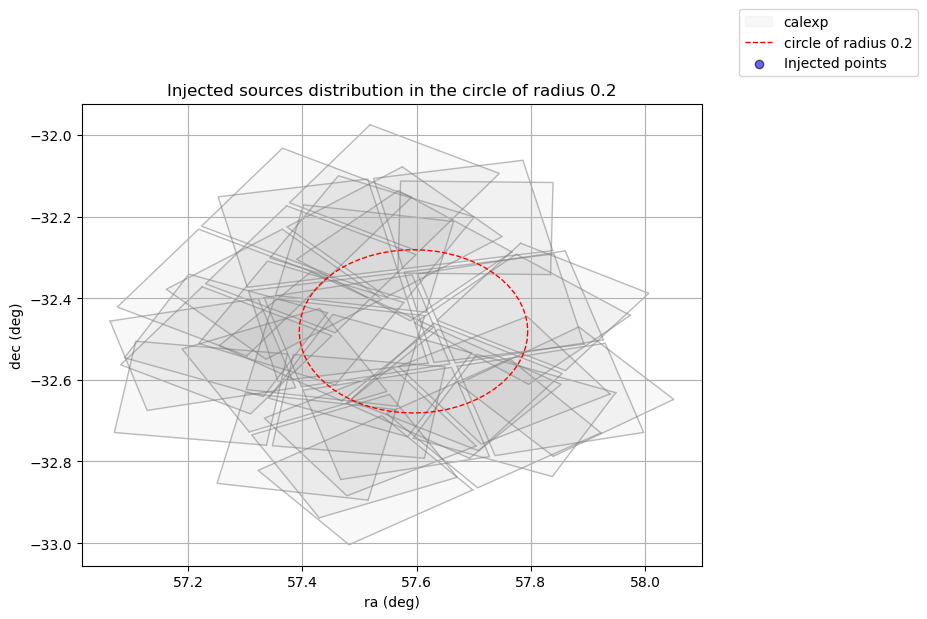

In [3]:
# check triangle injection OVERLAP

process = Run(ra=57.59451632893858, dec=-32.481152201226145, scale=0.2, bands="i", 
              name = f"test_circle", calexps_method = "overlap")
process.collect_calexp()
process.sky_map(calexps = 40, inj_points = False)

(ra,dec) = (57.59451632893858, -32.481152201226145) 
Circle of radius ~0.20 deg.
Found 910 calexps.
r=0.2 deg   area=0.12566370614359174 deg² dens=1000.0 sources/deg²    n=126 sources


Loading calexps: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


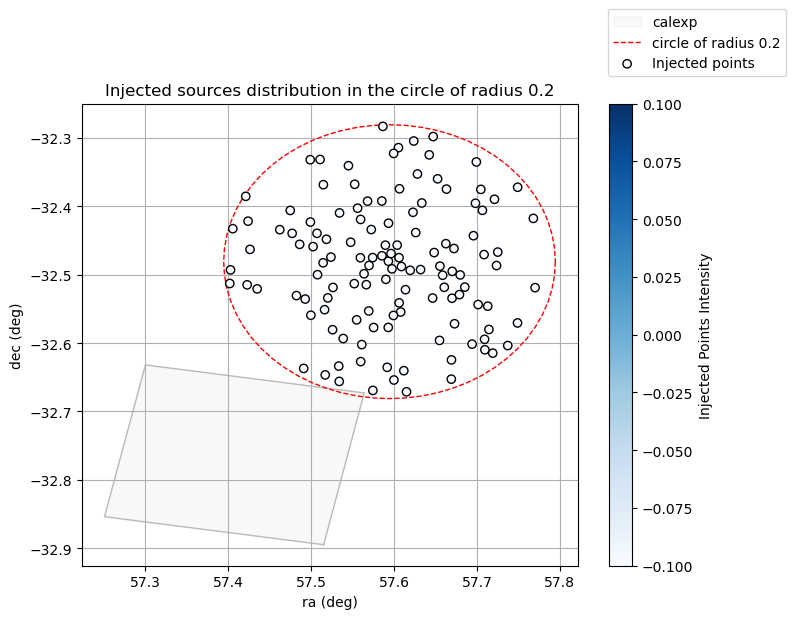

In [7]:
# check triangle injection OVERLAP
density = np.array([50])/0.05 # sources per calexps (0.05 deg²)
radius = [0.2] #[0.1,0.2,0.3, 0.5]
for dens in density:
    for r in radius:
        process = Run(57.59451632893858, -32.481152201226145, r,"i", name = f"test_circle", method = "overlap")
        process.collect_calexp()
        area= np.pi*r**2; n = int(dens*area)+1
        print(f"{r=} deg   {area=} deg² {dens=} sources/deg²    {n=} sources")
        params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
        for p in params:
            ra, dec = process.generate_location()
            process.add_lc(ra, dec, p, "i")
        process.sky_map(calexps = True)
        # calexp = Calexp(process.datasetRefs[0])
        # ax = calexp.plot()
        # for lc in process.inj_lc:
        #     calexp.add_point(ax, lc.ra, lc.dec) 

In [9]:
from tqdm.notebook import tqdm
from shapely.geometry import Polygon, Point
data_rows = list(process.data_calexp.iterrows())  # Convierte a lista
overlap_with_circle = []
for idx, data in tqdm(data_rows):  # `tqdm` detectará automáticamente el tamaño
    dataId = data[['visit', 'detector']].to_dict()
    calexp = Calexp(dataId)
    ra_corners, dec_corners = calexp.get_corners()
    calexp_polygon = Polygon(zip(ra_corners, dec_corners))
    center = Point(process.ra, process.dec)
    circle = center.buffer(process.radius, resolution=50)  # Más resolución = círculo más preciso
    overlap_with_circle.append(calexp_polygon.intersects(circle))


  0%|          | 0/910 [00:00<?, ?it/s]

In [12]:
sum(overlap_with_circle), len(overlap_with_circle)

(757, 910)

Loading calexps: 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]


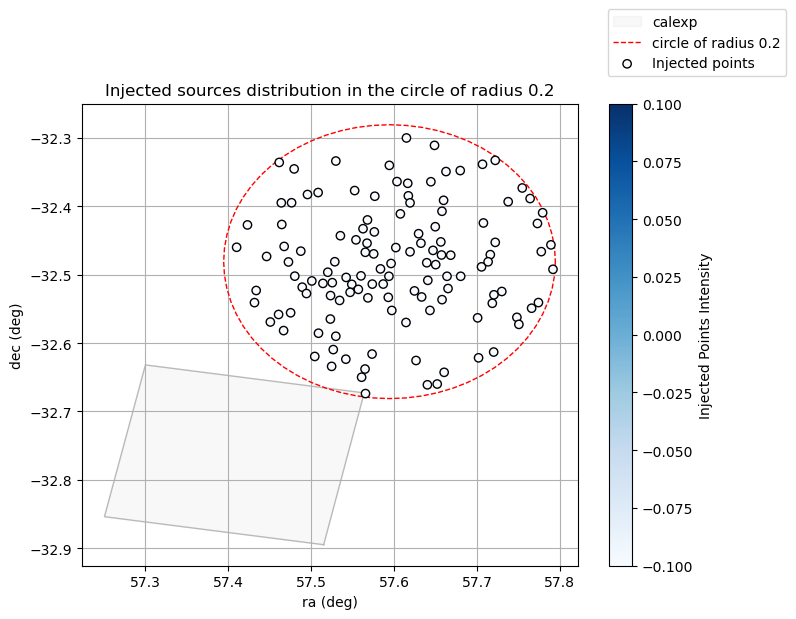

In [39]:
process.sky_map(calexps = True)

In [5]:
! pip install spherical_geometry

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 3.2 MB/s eta 0:00:00a 0:00:01


In [29]:
from shapely.geometry import Polygon, Point
ra_corners, dec_corners = calexp.get_corners()
calexp_polygon = Polygon(zip(ra_corners, dec_corners))
center = Point(process.ra, process.dec)
circle = center.buffer(process.radius, resolution=50)  # Más resolución = círculo más preciso
calexp_polygon.intersects(circle)

True

#### Number of calexps 
per HTM level or radius

In [10]:
# number of calexps - overlap
radius = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1] #]10**np.arange(-5, 0.25,0.25, dtype=float)
n_calexps = []
n = 1
for rad in radius:
    print(f"||||||||||||||------------RADIUS: {rad} -----------||||||||||||||")
    process = Run(name = f"test_triangle", query_calexps = "overlap", radius = rad)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,20)]
    process.add_lc(params[0], ra=57.59451, dec=-32.48115, band="i")
    n_calexps.append(len(process.calexp_data_ref))


||||||||||||||------------LEVEL: 9.999999999999999e-06 -----------||||||||||||||
Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 1.7782794100389226e-05 -----------||||||||||||||
Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 3.1622776601683795e-05 -----------||||||||||||||
Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 5.623413251903491e-05 -----------||||||||||||||
Found 145 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 9.999999999999999e-05 -----------||||||||||||||
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.0001778279410038923 -----------||||||||||||||
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.00031622776601683794 -----------||||||||||||||
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.000562341325190349 -----------||||||||||||||
Found 147 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.001 -----------||||||||||||||
Found 148 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.0017782794100389228 -----------||||||||||||||
Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.0031622776601683794 -----------||||||||||||||
Found 153 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.005623413251903491 -----------||||||||||||||
Found 162 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.01 -----------||||||||||||||
Found 171 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.01778279410038923 -----------||||||||||||||
Found 193 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.03162277660168379 -----------||||||||||||||
Found 235 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.056234132519034905 -----------||||||||||||||
Found 305 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.09999999999999999 -----------||||||||||||||
Found 471 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.1778279410038923 -----------||||||||||||||
Found 796 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.31622776601683794 -----------||||||||||||||
Found 1631 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 0.5623413251903491 -----------||||||||||||||
Found 3747 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 1.0 -----------||||||||||||||
Found 9553 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 1.7782794100389228 -----------||||||||||||||


Found 20000 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


||||||||||||||------------LEVEL: 3.162277660168379 -----------||||||||||||||


Found 20000 calexps


KeyboardInterrupt: 

In [50]:
from tools import spherical_area
from lsst.sphgeom import HtmPixelization, UnitVector3d, LonLat
levels = np.arange(6,20)
n_calexps_htm = []
n = 1
vertexs = []
bound_circ = []
ra=57.59451; dec=-32.48115
for lvl in levels:
    print(f"||||||||||||||------------LEVEL: {lvl} -----------||||||||||||||")
    process = Run(name = f"test_triangle", htm_level=lvl)
    params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
    process.add_lc(params[0], ra=57.59451, dec=-32.48115, band="i")
    n_calexps_htm.append(len(process.calexp_data_ref))
    pixelization = HtmPixelization(lvl)
    htm_id = pixelization.index(UnitVector3d(LonLat.fromDegrees(ra, dec)))
    htm_triangle = pixelization.triangle(htm_id)
    r = htm_triangle.getBoundingCircle().getOpeningAngle().asDegrees()
    bound_circ.append(r)
    vertexs.append(htm_triangle.getVertices())

||||||||||||||------------LEVEL: 6 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 36775 - HTM_level=6 (bounded by a circle of radius ~4489.73 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 16636 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 7 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 147102 - HTM_level=7 (bounded by a circle of radius ~2245.02 arcsec.)
Found 6894 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 8 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 588408 - HTM_level=8 (bounded by a circle of radius ~1122.53 arcsec.)
Found 2697 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 9 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 2353633 - HTM_level=9 (bounded by a circle of radius ~561.27 arcsec.)
Found 514 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 10 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 9414534 - HTM_level=10 (bounded by a circle of radius ~280.63 arcsec.)
Found 313 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 11 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 37658136 - HTM_level=11 (bounded by a circle of radius ~140.32 arcsec.)
Found 229 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 12 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 150632544 - HTM_level=12 (bounded by a circle of radius ~70.16 arcsec.)
Found 187 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 13 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 602530178 - HTM_level=13 (bounded by a circle of radius ~35.08 arcsec.)
Found 167 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 14 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 2410120715 - HTM_level=14 (bounded by a circle of radius ~17.54 arcsec.)
Found 155 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 15 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 9640482861 - HTM_level=15 (bounded by a circle of radius ~8.77 arcsec.)
Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 16 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 38561931445 - HTM_level=16 (bounded by a circle of radius ~4.38 arcsec.)
Found 148 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 17 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 154247725781 - HTM_level=17 (bounded by a circle of radius ~2.19 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 18 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 616990903127 - HTM_level=18 (bounded by a circle of radius ~1.10 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


||||||||||||||------------LEVEL: 19 -----------||||||||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 2467963612508 - HTM_level=19 (bounded by a circle of radius ~0.55 arcsec.)
Found 146 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(radius, n_calexps, "o-", label = "radius overlap")
plt.plot(bound_circ, n_calexps_htm, "o-", label = "radius htm")
plt.xscale("log")
plt.legend()
plt.savefig("analysis/comparison_radius_OVERLAP_HTM.png", bbox_inches="tight")
plt.figure()
plt.title("Areas comparison OVERLAP and HTM")
area_overlap = (np.array(radius)**2)*np.pi
area_htm_rad = (np.array(bound_circ)**2)*np.pi
area_htm_tri  = np.pi/(2*4**(levels-1)) *(180/np.pi)**2 # Area of HTM triangles in degrees²  https://arxiv.org/pdf/cs/0701164
plt.plot(area_overlap, n_calexps, "o-", label = "overlap")
plt.plot(area_htm_rad, n_calexps_htm, "o-", label = "radius htm")
plt.plot(area_htm_tri, n_calexps_htm, "o-", label = "triangle htm")
plt.xscale("log")
plt.legend()
plt.savefig("analysis/comparison_areas_OVERLAP_HTM.png", bbox_inches="tight")

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Cargar datos de htm
# file_path_htm = "analysis/htm_calexps/htm_n_calexps.txt"
# data_htm = np.loadtxt(file_path_htm, delimiter="\t", skiprows=1)
# n_calexps = data_htm[:, 3]

levels = np.arange(6, 20)  # HTM levels
n_calexps = np.array(n_calexps) 
htm_area_deg2 = np.pi/(2*4**(levels-1)) *(180/np.pi)**2 # Area of HTM triangles in degrees²  https://arxiv.org/pdf/cs/0701164
htm_area_arcmin2 = np.array(htm_area_deg2) * 3600  # Area in arcmin²

output_dir_main = "analysis"
os.makedirs(output_dir_main, exist_ok=True)
output_dir = f"{output_dir_main}/htm_calexps"
os.makedirs(output_dir, exist_ok=True)

np.savetxt(f"{output_dir}/htm_n_calexps.txt", np.column_stack((levels, htm_area_deg2, n_calexps)), delimiter="\t", header="level\tarea_lvl\tn_calexps")


output_dir_main = "analysis"
os.makedirs(output_dir_main, exist_ok=True)
output_dir = f"{output_dir_main}/htm_calexps"
os.makedirs(output_dir, exist_ok=True)

def plot_and_save(x_data, y_data, x_label, y_label, title, filename, x_log=False, y_log=False):
    plt.figure()
    plt.plot(x_data, y_data, "o-", label=y_label)
    if x_log:
        plt.xscale("log")
    if y_log:
        plt.yscale("log")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.savefig(os.path.join(output_dir, filename), bbox_inches="tight")
    plt.close()

plot_and_save(
    levels,
    n_calexps,
    "HTM Level",
    "Number of Calexps",
    "HTM Level vs Number of Calexps (log Y)",
    "htm_level_vs_calexps_log.png",
    y_log=True,
)
plot_and_save(
    htm_area_deg2,
    n_calexps,
    "HTM Area (degrees²)",
    "Number of Calexps",
    "HTM Area (deg²) vs Number of Calexps (log Y)",
    "htm_area_deg2_vs_calexps_log.png",
    y_log=True,
)
plot_and_save(
    htm_area_arcmin2,
    n_calexps,
    "HTM Area (arcmin²)",
    "Number of Calexps",
    "HTM Area (arcmin²) vs Number of Calexps (log Y)",
    "htm_area_arcmin2_vs_calexps_log.png",
    y_log=True,
)
plot_and_save(
    levels,
    n_calexps,
    "HTM Level",
    "Number of Calexps",
    "HTM Level vs Number of Calexps (log X and Y)",
    "htm_level_vs_calexps_logxy.png",
    x_log=True,
    y_log=True,
)
plot_and_save(
    htm_area_deg2,
    n_calexps,
    "HTM Area (degrees²)",
    "Number of Calexps",
    "HTM Area (deg²) vs Number of Calexps (log X and Y)",
    "htm_area_deg2_vs_calexps_logxy.png",
    x_log=True,
    y_log=True,
)
plot_and_save(
    htm_area_arcmin2,
    n_calexps,
    "HTM Area (arcmin²)",
    "Number of Calexps",
    "HTM Area (arcmin²) vs Number of Calexps (log X and Y)",
    "htm_area_arcmin2_vs_calexps_logxy.png",
    x_log=True,
    y_log=True,
)

print("Plots have been saved in the 'analysis' directory.")


Plots have been saved in the 'analysis' directory.


In [83]:
n_calexps, htm_area_deg2

(array([16636,  6894,  2697,   514,   313,   229,   187,   167,   155,
          150,   148,   146,   146,   146]),
 array([5.03576187e+00, 1.25894047e+00, 3.14735117e-01, 7.86837792e-02,
        1.96709448e-02, 4.91773620e-03, 1.22943405e-03, 3.07358513e-04,
        7.68396282e-05, 1.92099070e-05, 4.80247676e-06, 1.20061919e-06,
        3.00154798e-07, 7.50386994e-08]))

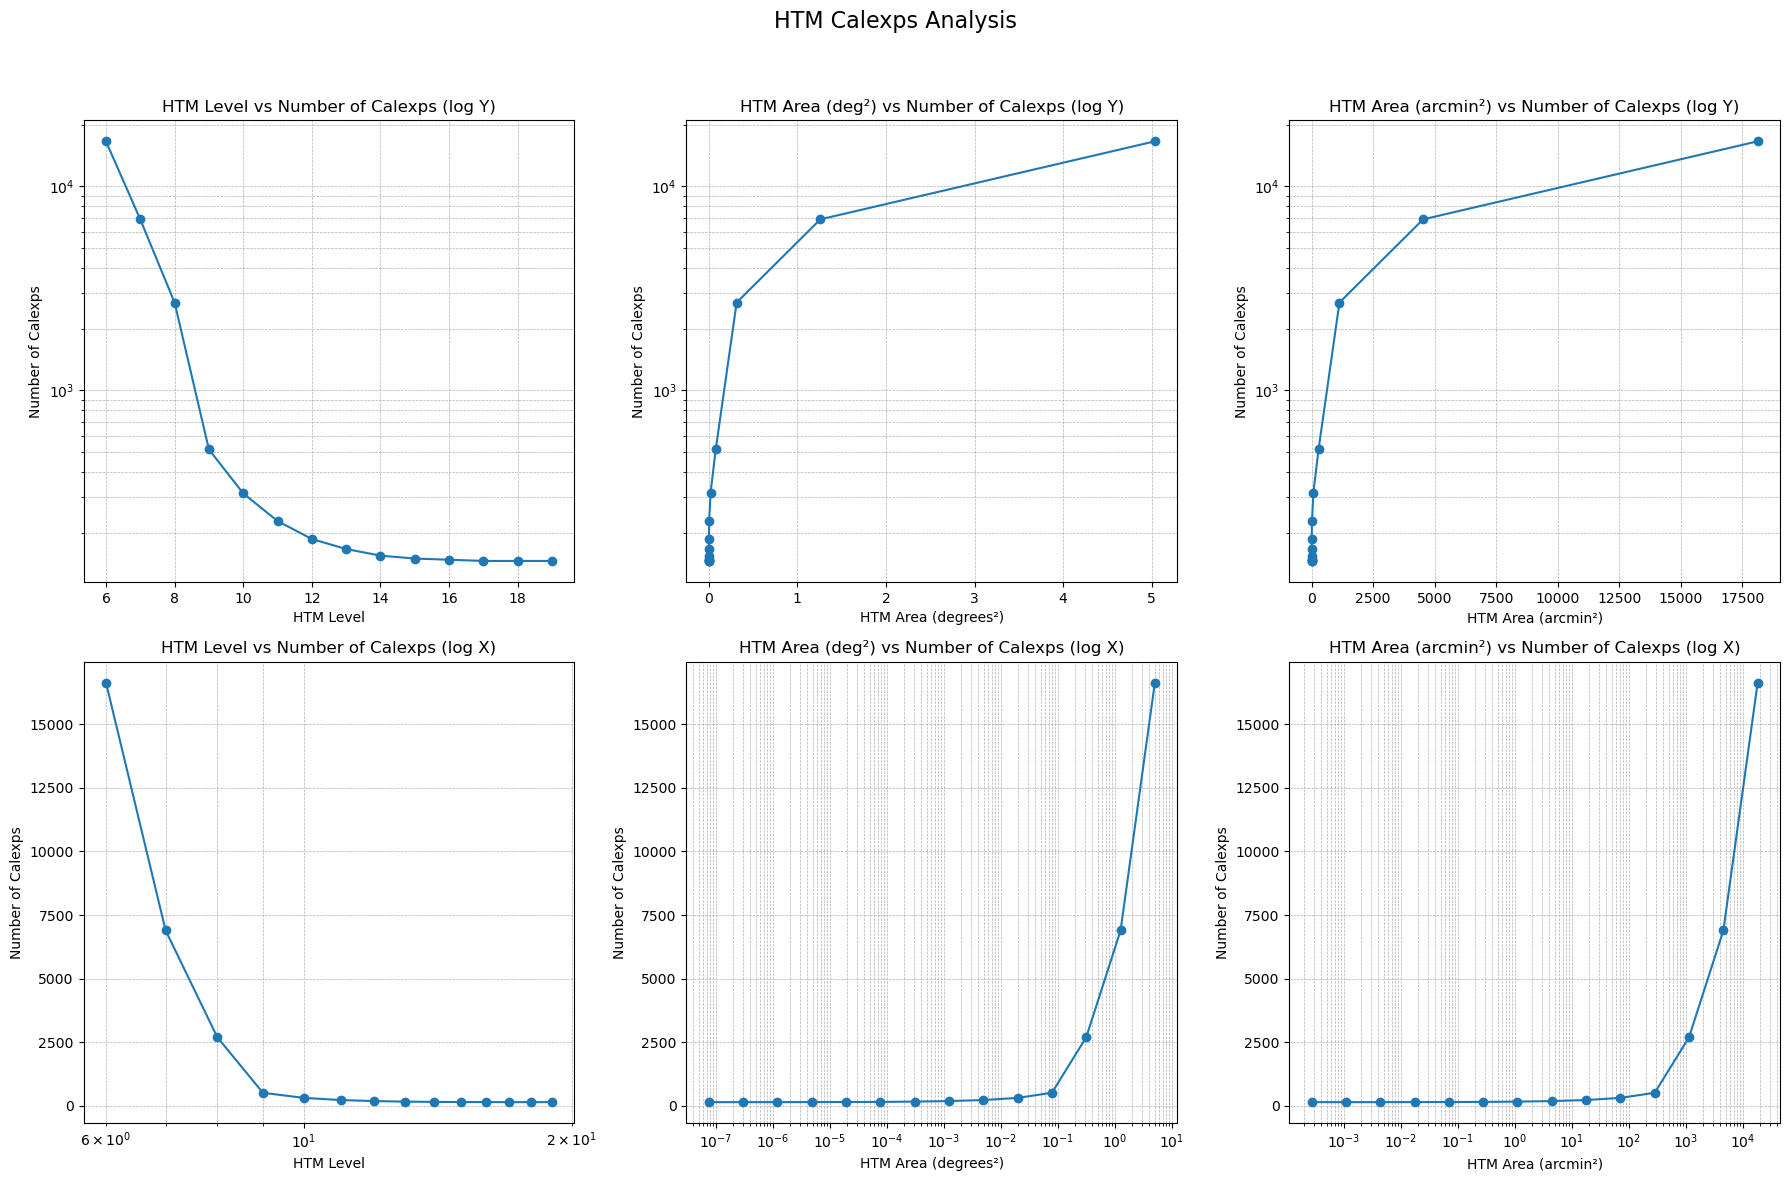

In [84]:

output_dir_main = "analysis"
os.makedirs(output_dir_main, exist_ok=True)
output_dir = f"{output_dir_main}/htm_calexps"
os.makedirs(output_dir, exist_ok=True)

# Crear figura grande con subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("HTM Calexps Analysis", fontsize=16)

# Subplot 1: HTM Level vs Number of Calexps (log Y)
axs[0, 0].plot(levels, n_calexps, "o-", label="Number of Calexps")
axs[0, 0].set_yscale("log")
axs[0, 0].set_title("HTM Level vs Number of Calexps (log Y)")
axs[0, 0].set_xlabel("HTM Level")
axs[0, 0].set_ylabel("Number of Calexps")
axs[0, 0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Subplot 2: HTM Area (deg²) vs Number of Calexps (log Y)
axs[0, 1].plot(htm_area_deg2, n_calexps, "o-", label="Number of Calexps")
axs[0, 1].set_yscale("log")
axs[0, 1].set_title("HTM Area (deg²) vs Number of Calexps (log Y)")
axs[0, 1].set_xlabel("HTM Area (degrees²)")
axs[0, 1].set_ylabel("Number of Calexps")
axs[0, 1].grid(True, which="both", linestyle="--", linewidth=0.5)

# Subplot 3: HTM Area (arcmin²) vs Number of Calexps (log Y)
axs[0, 2].plot(htm_area_arcmin2, n_calexps, "o-", label="Number of Calexps")
axs[0, 2].set_yscale("log")
axs[0, 2].set_title("HTM Area (arcmin²) vs Number of Calexps (log Y)")
axs[0, 2].set_xlabel("HTM Area (arcmin²)")
axs[0, 2].set_ylabel("Number of Calexps")
axs[0, 2].grid(True, which="both", linestyle="--", linewidth=0.5)

# Subplot 4: HTM Level vs Number of Calexps (log X and Y)
axs[1, 0].plot(levels, n_calexps, "o-", label="Number of Calexps")
axs[1, 0].set_xscale("log")
axs[1, 0].set_title("HTM Level vs Number of Calexps (log X)")
axs[1, 0].set_xlabel("HTM Level")
axs[1, 0].set_ylabel("Number of Calexps")
axs[1, 0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Subplot 5: HTM Area (deg²) vs Number of Calexps (log X and Y)
axs[1, 1].plot(htm_area_deg2, n_calexps, "o-", label="Number of Calexps")
axs[1, 1].set_xscale("log")
axs[1, 1].set_title("HTM Area (deg²) vs Number of Calexps (log X)")
axs[1, 1].set_xlabel("HTM Area (degrees²)")
axs[1, 1].set_ylabel("Number of Calexps")
axs[1, 1].grid(True, which="both", linestyle="--", linewidth=0.5)

# Subplot 6: HTM Area (arcmin²) vs Number of Calexps (log X and Y)
axs[1, 2].plot(htm_area_arcmin2, n_calexps, "o-", label="Number of Calexps")
axs[1, 2].set_xscale("log")
axs[1, 2].set_title("HTM Area (arcmin²) vs Number of Calexps (log X)")
axs[1, 2].set_xlabel("HTM Area (arcmin²)")
axs[1, 2].set_ylabel("Number of Calexps")
axs[1, 2].grid(True, which="both", linestyle="--", linewidth=0.5)

# Ajustar espacios y guardar figura
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig(os.path.join(output_dir, "htm_calexps_combined.png"))
plt.show()


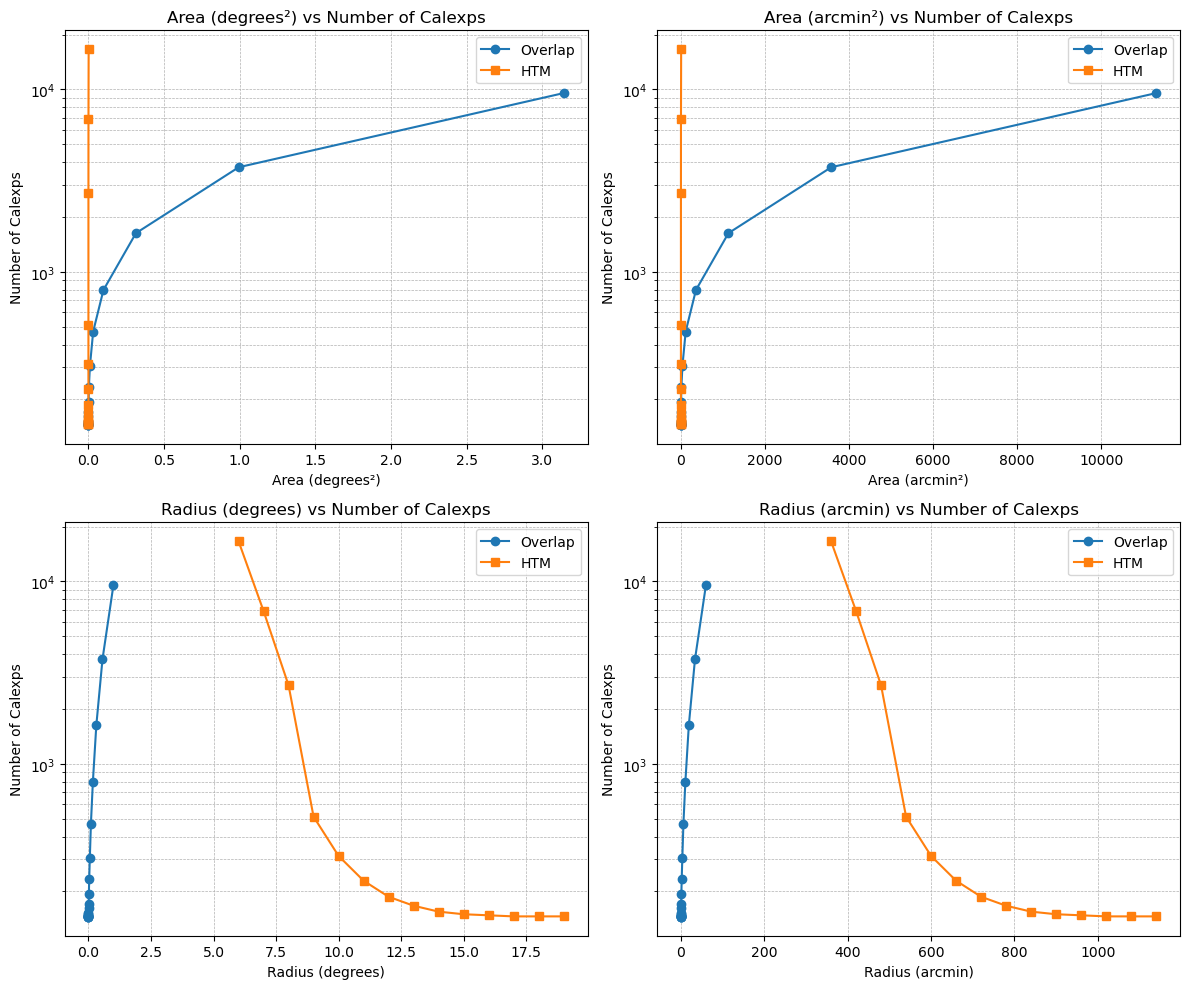

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# overlap data
# file_path_overlap = "analysis/overlap_calexps/overlap_n_calexps.txt"
# data_overlap = np.loadtxt(file_path_overlap, delimiter="\t", skiprows=1)
# levels_overlap = data_overlap[:, 0]
# area_deg2_overlap = data_overlap[:, 1]
# n_calexps_overlap = data_overlap[:, 2]

# #  htm data
# file_path_htm = "analysis/htm_calexps/htm_n_calexps.txt"
# data_htm = np.loadtxt(file_path_htm, delimiter="\t", skiprows=1)
# levels_htm = data_htm[:, 0]
# area_deg2_htm = data_htm[:, 1]
# n_calexps_htm = data_htm[:, 2]

# area_arcmin2_overlap = area_deg2_overlap * 3600
# area_arcmin2_htm = area_deg2_htm * 3600

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Area (degrees²) vs Number of Calexps
axs[0, 0].plot(area_deg2_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[0, 0].plot(area_deg2_htm, n_calexps_htm, "s-", label="HTM")
axs[0, 0].set_xscale("linear")
axs[0, 0].set_yscale("log")
axs[0, 0].set_title("Area (degrees²) vs Number of Calexps")
axs[0, 0].set_xlabel("Area (degrees²)")
axs[0, 0].set_ylabel("Number of Calexps")
axs[0, 0].legend()
axs[0, 0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 2: Area (arcmin²) vs Number of Calexps
axs[0, 1].plot(area_arcmin2_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[0, 1].plot(area_arcmin2_htm, n_calexps_htm, "s-", label="HTM")
axs[0, 1].set_xscale("linear")
axs[0, 1].set_yscale("log")
axs[0, 1].set_title("Area (arcmin²) vs Number of Calexps")
axs[0, 1].set_xlabel("Area (arcmin²)")
axs[0, 1].set_ylabel("Number of Calexps")
axs[0, 1].legend()
axs[0, 1].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 3: Levels (radius in degrees) vs Number of Calexps
axs[1, 0].plot(levels_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[1, 0].plot(levels_htm, n_calexps_htm, "s-", label="HTM")
axs[1, 0].set_xscale("linear")
axs[1, 0].set_yscale("log")
axs[1, 0].set_title("Radius (degrees) vs Number of Calexps")
axs[1, 0].set_xlabel("Radius (degrees)")
axs[1, 0].set_ylabel("Number of Calexps")
axs[1, 0].legend()
axs[1, 0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 4: Radius (arcmin) vs Number of Calexps
radius_arcmin_overlap = levels_overlap * 60
radius_arcmin_htm = levels_htm * 60
axs[1, 1].plot(radius_arcmin_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[1, 1].plot(radius_arcmin_htm, n_calexps_htm, "s-", label="HTM")
axs[1, 1].set_xscale("linear")
axs[1, 1].set_yscale("log")
axs[1, 1].set_title("Radius (arcmin) vs Number of Calexps")
axs[1, 1].set_xlabel("Radius (arcmin)")
axs[1, 1].set_ylabel("Number of Calexps")
axs[1, 1].legend()
axs[1, 1].grid(True, which="both", linestyle="--", linewidth=0.5)

# Ajustar diseño y guardar figura
plt.tight_layout()
output_file = "analysis/comparison_overlap_htm.png"
plt.savefig(output_file, bbox_inches="tight")
plt.show()


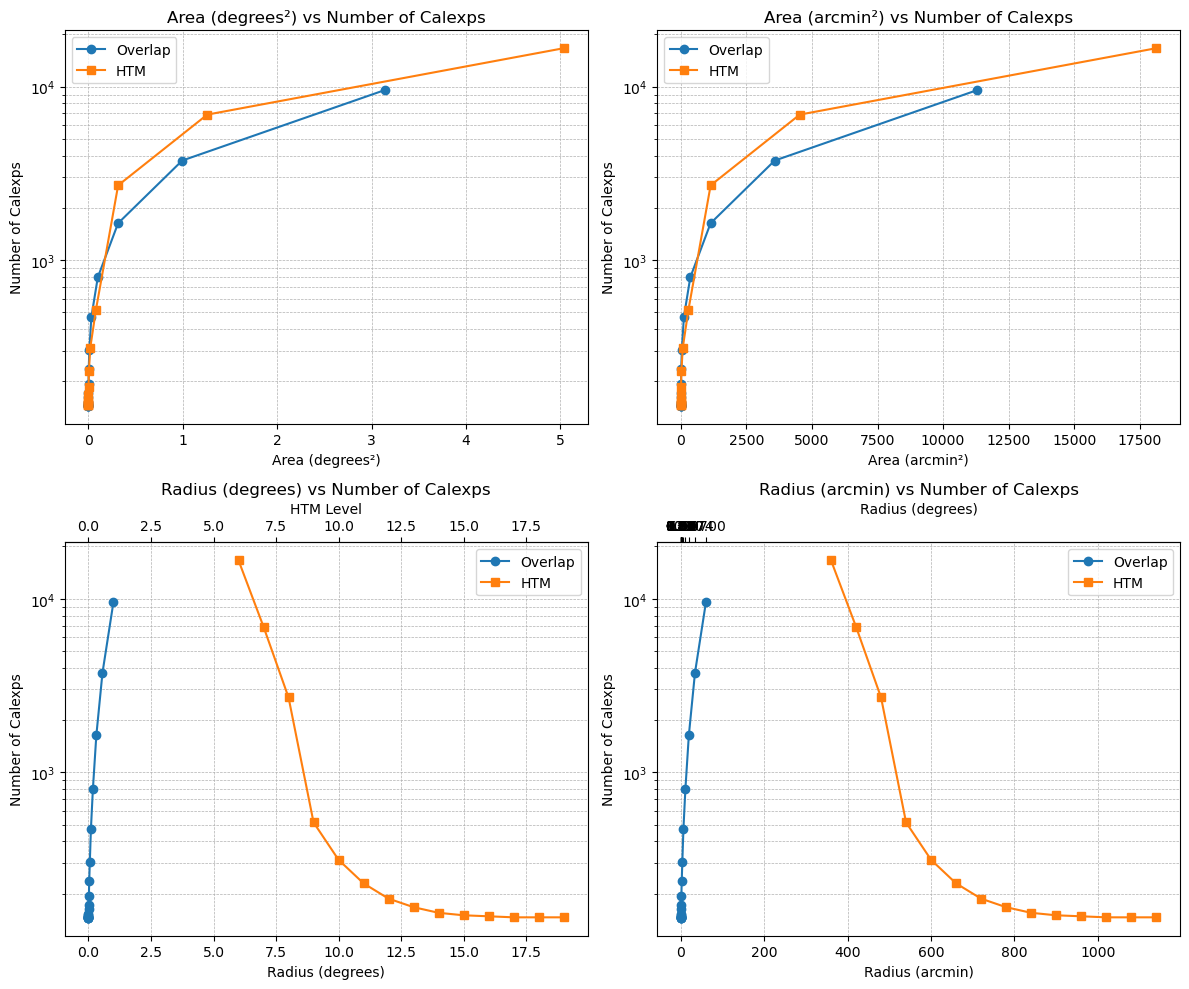

In [86]:
import matplotlib.pyplot as plt
import numpy as np


file_path_overlap = "analysis/overlap_calexps/overlap_n_calexps.txt"
data_overlap = np.loadtxt(file_path_overlap, delimiter="\t", skiprows=1)
levels_overlap = data_overlap[:, 0]
area_deg2_overlap = data_overlap[:, 1]
n_calexps_overlap = data_overlap[:, 2]

file_path_htm = "analysis/htm_calexps/htm_n_calexps.txt"
data_htm = np.loadtxt(file_path_htm, delimiter="\t", skiprows=1)
levels_htm = data_htm[:, 0]
area_deg2_htm = data_htm[:, 1]
n_calexps_htm = data_htm[:, 2]
area_arcmin2_overlap = area_deg2_overlap * 3600
area_arcmin2_htm = area_deg2_htm * 3600

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Area (degrees²) vs Number of Calexps
axs[0, 0].plot(area_deg2_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[0, 0].plot(area_deg2_htm, n_calexps_htm, "s-", label="HTM")
axs[0, 0].set_xscale("linear")
axs[0, 0].set_yscale("log")
axs[0, 0].set_title("Area (degrees²) vs Number of Calexps")
axs[0, 0].set_xlabel("Area (degrees²)")
axs[0, 0].set_ylabel("Number of Calexps")
axs[0, 0].legend()
axs[0, 0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 2: Area (arcmin²) vs Number of Calexps
axs[0, 1].plot(area_arcmin2_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[0, 1].plot(area_arcmin2_htm, n_calexps_htm, "s-", label="HTM")
axs[0, 1].set_xscale("linear")
axs[0, 1].set_yscale("log")
axs[0, 1].set_title("Area (arcmin²) vs Number of Calexps")
axs[0, 1].set_xlabel("Area (arcmin²)")
axs[0, 1].set_ylabel("Number of Calexps")
axs[0, 1].legend()
axs[0, 1].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 3: Levels (radius in degrees) vs Number of Calexps
axs[1, 0].plot(levels_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[1, 0].plot(levels_htm, n_calexps_htm, "s-", label="HTM")
axs[1, 0].set_xscale("linear")
axs[1, 0].set_yscale("log")
axs[1, 0].set_title("Radius (degrees) vs Number of Calexps")
axs[1, 0].set_xlabel("Radius (degrees)")
axs[1, 0].set_ylabel("Number of Calexps")
axs[1, 0].legend()
axs[1, 0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Eje adicional arriba para Levels
secax_levels = axs[1, 0].secondary_xaxis("top")
secax_levels.set_xlabel("HTM Level")


# Gráfico 4: Radius (arcmin) vs Number of Calexps
radius_arcmin_overlap = levels_overlap * 60
radius_arcmin_htm = levels_htm * 60
axs[1, 1].plot(radius_arcmin_overlap, n_calexps_overlap, "o-", label="Overlap")
axs[1, 1].plot(radius_arcmin_htm, n_calexps_htm, "s-", label="HTM")
axs[1, 1].set_xscale("linear")
axs[1, 1].set_yscale("log")
axs[1, 1].set_title("Radius (arcmin) vs Number of Calexps")
axs[1, 1].set_xlabel("Radius (arcmin)")
axs[1, 1].set_ylabel("Number of Calexps")
axs[1, 1].legend()
axs[1, 1].grid(True, which="both", linestyle="--", linewidth=0.5)

secax_radius = axs[1, 1].secondary_xaxis("top")
secax_radius.set_xlabel("Radius (degrees)")

# Convertir de arcmin a grados y actualizar las etiquetas
secax_radius.set_xticks(radius_arcmin_overlap)  # Usar las posiciones de arcmin



# Ajustar diseño y guardar figura
plt.tight_layout()
output_file = "analysis/comparison_overlap_htm_with_top_axes.png"
plt.savefig(output_file, bbox_inches="tight")
plt.show()


In [64]:
n_calexps_htm

array([1.57367706e-01, 1.96709633e-02, 2.45887041e-03, 3.07358801e-04,
       3.84198502e-05, 4.80248127e-06, 6.00310159e-07, 7.50387699e-08,
       9.37984623e-09, 1.17248078e-09, 1.46560097e-10, 1.83200122e-11,
       2.29000152e-12, 2.86250190e-13])

In [99]:
radius = np.sqrt(3.073585126505738274e-04/np.pi); lvl = 14
process = Run(name = f"test_triangle", query_calexps = "overlap", radius = radius)
params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,20)]
process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
dataref_overlap = process.calexp_data_ref
process = Run(name = f"test_triangle", htm_level=lvl)
params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145)
dataref_htm = process.calexp_data_ref

Found 171 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)
/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


(ra,dec) = (57.59451632893858, -32.481152201226145)
HTM_ID = 2410120715 - HTM_level=14 (bounded by a circle of radius ~17.54 arcsec.)
Found 155 calexps


/home/karennowo/DP0_microlensing/light_curves.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


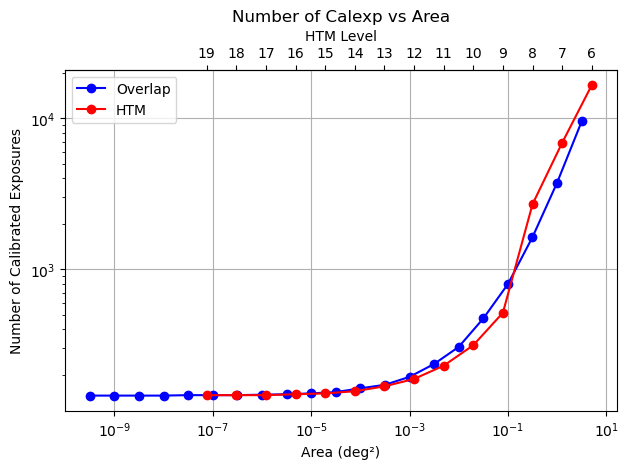

In [100]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots()
ax1.plot(area_deg2_overlap, n_calexps_overlap, "bo-", label="Overlap")
ax1.plot(htm_area_deg2, n_calexps_htm, "ro-", label="HTM")
ax1.set_xlabel("Area (deg²)")
ax1.set_ylabel("Number of Calibrated Exposures")
ax1.legend()
ax1.grid()
ax1.set_xscale("log")
ax1.set_yscale("log")
secax = ax1.secondary_xaxis('top')
secax.set_xlabel("HTM Level")
secax.set_xticks(htm_area_deg2)  # Usa las mismas posiciones de las áreas en el eje inferior
secax.set_xticklabels(levels)  # Asigna los niveles HTM como etiquetas
plt.title("Number of Calexp vs Area")
plt.tight_layout()
plt.show()


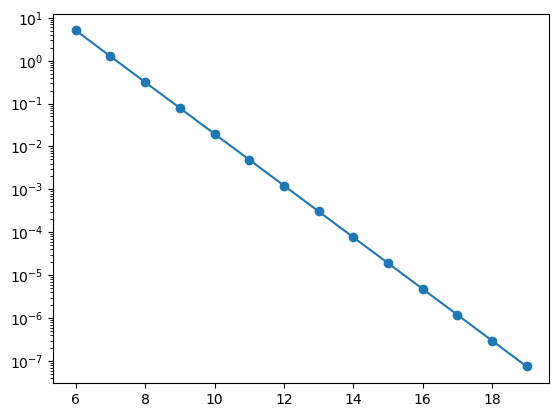

In [103]:
plt.plot(levels, htm_area_deg2, "o-")
plt.yscale("log")